In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency



In [2]:
# Load the dataset
heart = pd.read_csv('heart_disease.csv')
# Explore the dataset
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


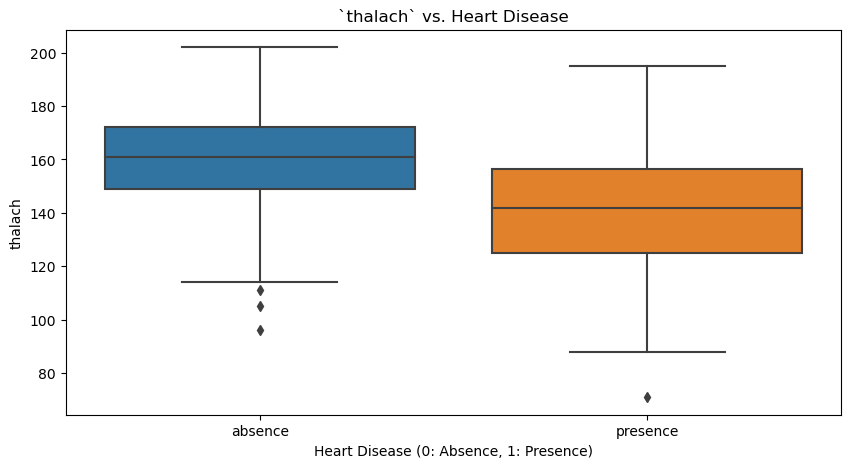

In [3]:
# Visualize `thalach` based on heart disease using a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.title('`thalach` vs. Heart Disease')
plt.xlabel('Heart Disease (0: Absence, 1: Presence)')
plt.ylabel('thalach')
plt.show()

In [7]:
# save `thalach` for hd patients and non-hd patients
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']


In [8]:
# Calculate and print mean and median differences
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('`thalach` mean Difference: ', mean_diff)
med_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('`thalach` median Difference: ', med_diff)

`thalach` mean Difference:  19.11905597473242
`thalach` median Difference:  19.0


In [9]:
# Run two-sample t-test
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for `thalach` two-sample t-test: ', pval)

p-value for `thalach` two-sample t-test:  3.456964908430172e-14


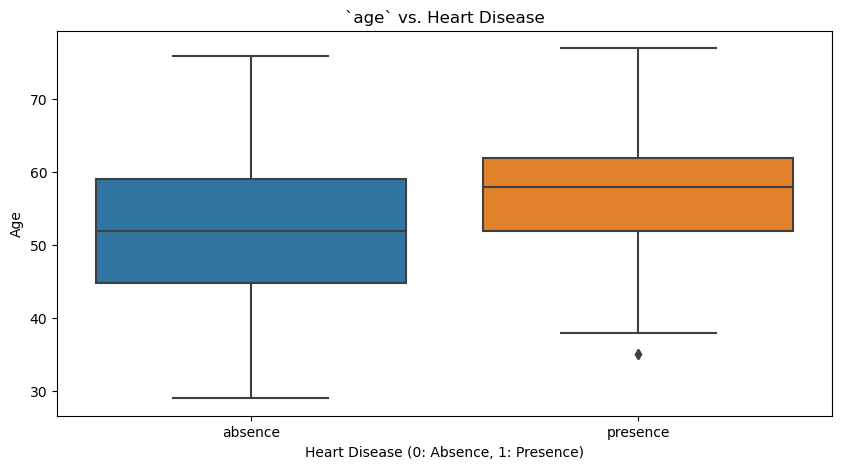

In [10]:
# Visualize `age` based on heart disease using a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.title('`age` vs. Heart Disease')
plt.xlabel('Heart Disease (0: Absence, 1: Presence)')
plt.ylabel('Age')
plt.show()

In [11]:
# Separate `age` values for heart disease patients and non-patients
age_hd = heart.age[heart.heart_disease == 1]
age_no_hd = heart.age[heart.heart_disease == 0]

In [13]:
# Calculate and print mean and median differences
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print('`age` mean Difference: ', mean_diff)
med_diff = np.median(age_hd) - np.median(age_no_hd)
print('`age` median Difference: ', med_diff)

`age` mean Difference:  4.040533426917001
`age` median Difference:  6.0


In [14]:
# Run two-sample t-test for age
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test: ', pval)

p-value for `age` two-sample t-test:  8.95563691752971e-05


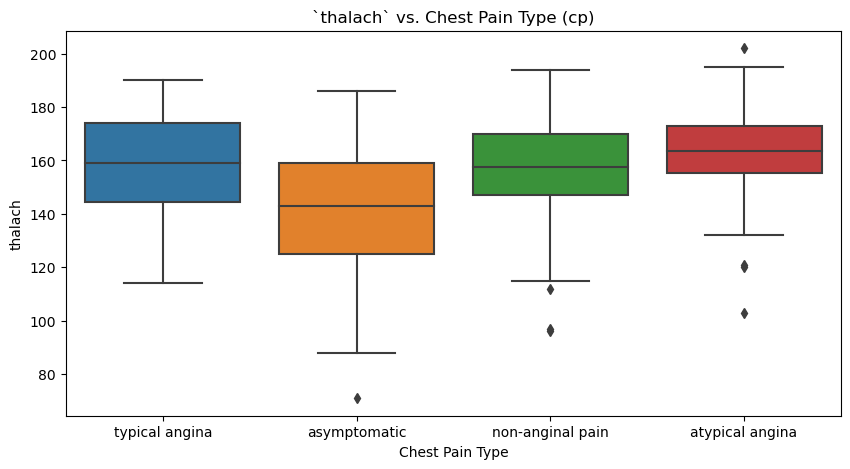

In [15]:
# Visualize `thalach` based on `cp`
plt.figure(figsize=(10, 5))
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.title('`thalach` vs. Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('thalach')
plt.show()

In [16]:
# Separate `thalach` values based on `cp`
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [17]:
# Run ANOVA
Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

p-value for ANOVA:  1.9065505247705008e-10


In [18]:
# Run Tukey's range test
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


In [19]:
# Create a contingency table of heart disease vs. chest pain type (cp)
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [20]:
# Run a chi-square test
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)

p-value for chi-square test:  1.2517106007837527e-17
